# Utilizando o modelo MNASNet pré-treinado

MnasNet, sigla para Multi-Objective Neural Architecture Search Network (Rede de Pesquisa de Arquitetura Neural Multiobjetiva), é uma estrutura projetada para criar modelos de redes neurais que otimizam tanto a precisão quanto a eficiência. O Paper de lançamento do modelo é este: https://arxiv.org/abs/1807.11626


O desenvolvimento do MnasNet pela equipe de IA do Google foi motivado pela necessidade de modelos de aprendizado profundo que pudessem operar dentro das restrições dos dispositivos móveis, como poder de processamento, memória e energia limitados. As redes neurais tradicionais, embora poderosas, muitas vezes exigem recursos computacionais substanciais, tornando-as impraticáveis para aplicações móveis. 


A MnasNet aborda esse desafio por meio de uma abordagem inovadora chamada Neural Architecture Search (NAS), que automatiza o design de modelos que são precisos e leves.


A MnasNet emprega uma estrutura NAS baseada em aprendizado por reforço que busca a arquitetura ideal, equilibrando uma função de objetivo duplo: maximizar a precisão da previsão e, ao mesmo tempo, minimizar o custo computacional. A estrutura avalia arquiteturas potenciais com base em seu desempenho em uma tarefa específica (por exemplo, reconhecimento de imagem) e sua eficiência (medida em termos de latência ou consumo de energia em dispositivos móveis).


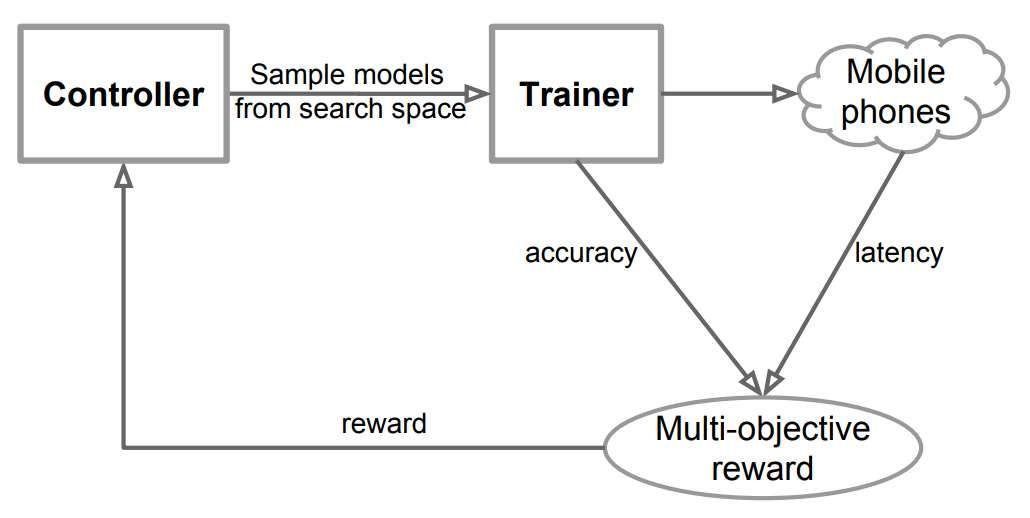

Arquitetura MnasNet 

Estrutura básica: O modelo MnasNet divide uma rede neural convolucional (CNN) em uma sequência de blocos predefinidos. Esses blocos reduzem gradualmente as resoluções de entrada enquanto aumentam os tamanhos dos filtros, uma estratégia comum em muitos modelos CNN. Cada bloco consiste em camadas idênticas em operações e conexões, determinadas por um espaço de pesquisa secundário por bloco.

Espaço de pesquisa secundário: Para cada bloco, o espaço de pesquisa secundário inclui opções para operações convolucionais (convolução regular, convolução em profundidade e convolução móvel invertida em gargalo), tamanhos de kernel (3x3, 5x5), squeeze-and-excitation ratios (0, 0,25), operações de salto (agrupamento, identidade, residual ou sem salto), tamanho do filtro de saída e número de camadas por bloco.

Configuração de camada e bloco: A arquitetura de uma camada é definida pela operação de convolução, tamanho do kernel, relação de squeeze-and-excitation, operação de salto e tamanho do filtro de saída, enquanto o número de repetições para a camada dentro de um bloco também é especificado. Por exemplo, uma camada no bloco 4 pode ter um gargalo invertido com uma convolução 5x5 e um caminho de salto residual de identidade, repetido um certo número de vezes.

Espaço de pesquisa hierárquico fatorizado: este espaço de pesquisa inovador equilibra a diversidade de camadas e o tamanho geral do espaço de pesquisa. Ele divide a rede em blocos, cada um com seu subespaço de pesquisa, reduzindo significativamente o tamanho total do espaço de pesquisa em comparação com uma abordagem de espaço de pesquisa plano por camada.

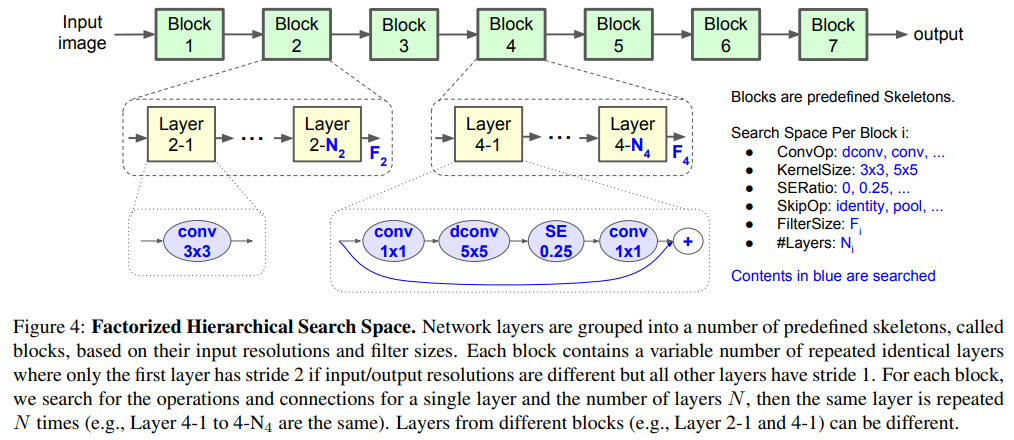

O MnasNet utiliza uma abordagem de aprendizagem por reforço para encontrar soluções ótimas que equilibram precisão e eficiência. Ele emprega um controlador baseado em rede neural recorrente (RNN), um treinador para avaliação da precisão do modelo e um mecanismo de inferência baseado em telefone celular para medição de latência. O processo de pesquisa da arquitetura é guiado por uma função de recompensa que leva em conta tanto a precisão quanto a latência, com o objetivo de encontrar modelos que tenham um bom desempenho sob restrições móveis.

In [1]:
import torchvision.models as models
import torch

model = models.mnasnet1_0(pretrained=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

c:\Anaconda\envs\modern\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Anaconda\envs\modern\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MNASNet1_0_Weights.IMAGENET1K_V1`. You can also use `weights=MNASNet1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/mnasnet1.0_top1_73.512-f206786ef8.pth" to C:\Users\Gabriel/.cache\torch\hub\checkpoints\mnasnet1.0_top1_73.512-f206786ef8.pth


100%|██████████| 16.9M/16.9M [00:00<00:00, 48.5MB/s]


MNASNet(
  (layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.00029999999999996696, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.00029999999999996696, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (7): BatchNorm2d(16, eps=1e-05, momentum=0.00029999999999996696, affine=True, track_running_stats=True)
    (8): Sequential(
      (0): _InvertedResidual(
        (layers): Sequential(
          (0): Conv2d(16, 48, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(48, eps=1e-05, momentum=0.00029999999999996696, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(48, 

In [2]:
model

MNASNet(
  (layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.00029999999999996696, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.00029999999999996696, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (7): BatchNorm2d(16, eps=1e-05, momentum=0.00029999999999996696, affine=True, track_running_stats=True)
    (8): Sequential(
      (0): _InvertedResidual(
        (layers): Sequential(
          (0): Conv2d(16, 48, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(48, eps=1e-05, momentum=0.00029999999999996696, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(48, 

In [3]:
model.eval()

MNASNet(
  (layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.00029999999999996696, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.00029999999999996696, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (7): BatchNorm2d(16, eps=1e-05, momentum=0.00029999999999996696, affine=True, track_running_stats=True)
    (8): Sequential(
      (0): _InvertedResidual(
        (layers): Sequential(
          (0): Conv2d(16, 48, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(48, eps=1e-05, momentum=0.00029999999999996696, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(48, 

In [4]:

import json
from PIL import Image
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms, models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

with open('imageNetclasses.json') as f:
  class_names = json.load(f)


def predict_image(images, class_names):
    to_pil = transforms.ToPILImage()
    fig=plt.figure(figsize=(16,16))

    for (i,image) in enumerate(images):
      # Convert to image and tensor
      image = to_pil(image)
      image_tensor = test_transforms(image).float()
      image_tensor = image_tensor.unsqueeze_(0)
      input = Variable(image_tensor)
      input = input.to(device)
      output = model(input)
      index = output.data.cpu().numpy().argmax()
      name = class_names[str(index)]
      
      # Plot image
      sub = fig.add_subplot(len(images),1, i+1)
      sub.set_title(f'Predicted {str(name)}')
      plt.axis('off')
      plt.imshow(image)
    plt.show()

data_dir = './images'

test_transforms = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.ToTensor(),
                                      #transforms.Normalize([0.485, 0.456, 0.406],
                                       #                   [0.229, 0.224, 0.225])
                                     ])

In [5]:
def get_images(directory='./images'):
    data = datasets.ImageFolder(directory, transform=test_transforms)
    num_images = len(data)
    loader = torch.utils.data.DataLoader(data, batch_size=num_images)
    dataiter = iter(loader)
    images, labels = next(dataiter)
    images, labels = images.to('cuda'), labels.to('cuda')
    return images

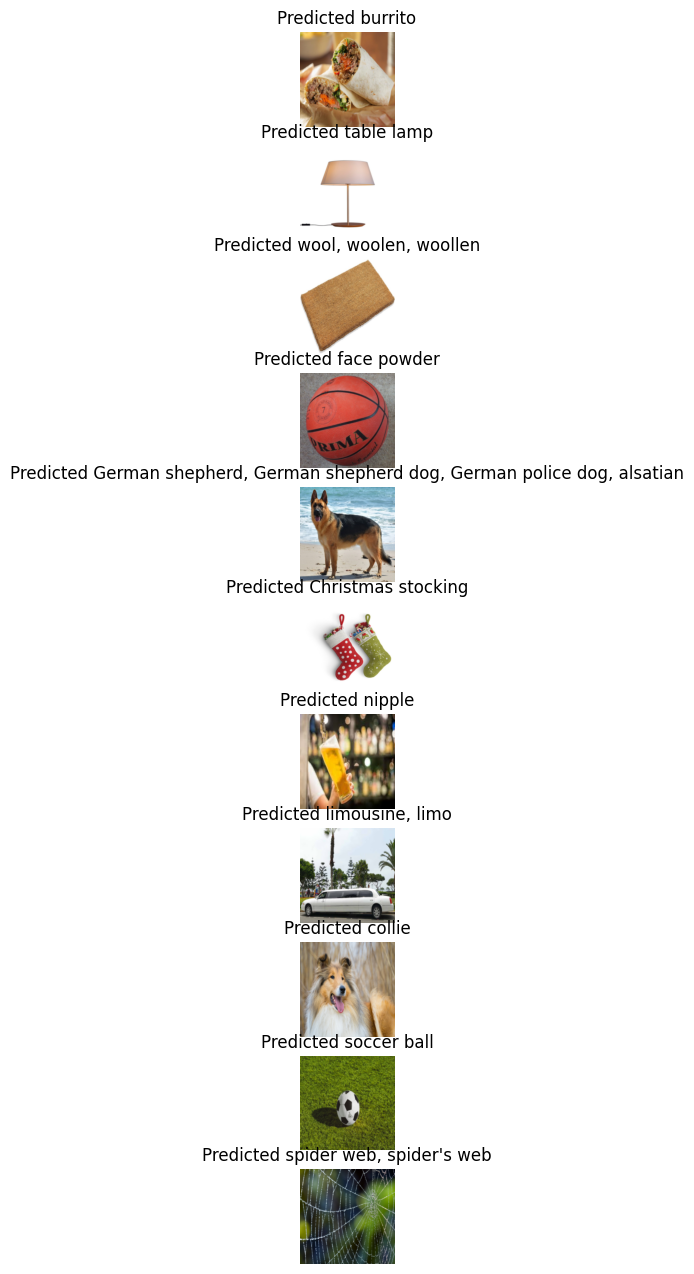

In [6]:
images = get_images('./images')
predict_image(images, class_names)